In [41]:
%pip install ta

Note: you may need to restart the kernel to use updated packages.


In [42]:
import sys
from datetime import date
import pandas as pd
import numpy as np
from jugaad_data.nse import stock_df
import seaborn as sns
import ta
import matplotlib.pyplot as plt

In [176]:
def graph(macd_line, signal_line):
    plt.figure(figsize = (12, 6))
    sns.set_style('dark')
    sns.set_theme('paper')
    sns.lineplot(x = macd_line.index, y = macd_line, label = 'macd_line (SBIN)')
    sns.lineplot(x = signal_line.index, y = signal_line, label = 'signal_line (SBIN)')
    diff = signal_line-macd_line
    # sns.barplot(x = diff.index, y = diff, palette= ['red', 'green'], hue)
    plt.bar(diff.index, diff, color=['green' if val > 0 else 'red' for val in diff], width=1)

In [177]:
def macd(df):
    short_window = 12
    long_window = 26
    
    short_ema = df['CLOSE'].ewm(span=short_window, adjust=False).mean()
    long_ema = df['CLOSE'].ewm(span=long_window, adjust=False).mean()
    
    macd_line = short_ema - long_ema
    
    signal_window = 9
    signal_line = macd_line.ewm(span=signal_window, adjust=False).mean()
    
    df['MACD'] = macd_line
    df['Signal_line'] = signal_line

    graph(macd_line, signal_line)

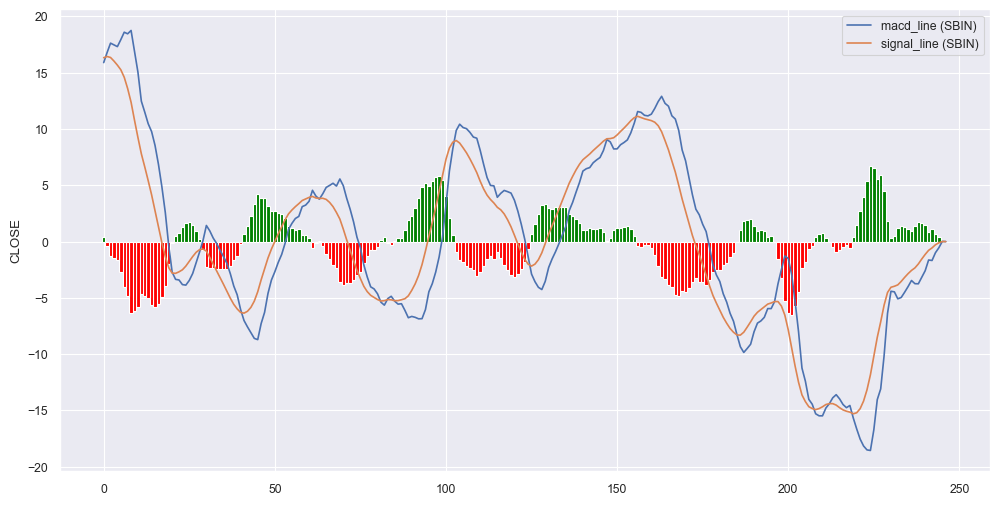

In [178]:
# ------------------------------------ generation of data frame --------------------------------------------
def generate_dataframe(symbol, today, lastday, train_data):
    # formatting the date
    to_day = int(today[:2])
    to_month = int(today[3:5])
    to_year = int(today[6:10])
    
    la_day = int(lastday[:2])
    la_month = int(lastday[3:5])
    la_year = int(lastday[6:10])
    
    df = pd.DataFrame(stock_df(symbol=symbol, from_date=date(to_year, to_month, to_day), to_date=date(la_year, la_month, la_day), series="EQ"))
    df = df[[ "DATE", "CLOSE", "HIGH", "LOW", "PREV. CLOSE", "VWAP", "NO OF TRADES", "OPEN"]]
    df = df.iloc[::-1]
    df['DATE'] = pd.to_datetime(df['DATE'], format='%d-%m-%Y')
    df['DATE'] = df['DATE'].dt.strftime('%d/%m/%Y')
    if (train_data == "0"):
        df.to_csv("Stocks/"+symbol+".csv", index=False)
    else:
        df.to_csv("Stocks/"+symbol+"_train.csv", index = False)
    
    macd(df)

# ----------------------------------------------- pickle --------------------------------------------------------
def write_pickle(DATA, symbol):
    pd.to_pickle(DATA, symbol + ".pkl")

# -------------------------------------------------------- MAIN -----------------------------------------------------------------------
def main():
    arguments = ["SBIN"]
    lastday = "01/01/2024"
    today = "01/01/2023"
    train_data = "0"
    for argument in arguments:
        generate_dataframe(argument, today, lastday, train_data)
    #write_pickle(DATA, "Stocks/" + argument)

if __name__ == "__main__":
    main()